## <span style="color:#db7d60">Setup</span>

In [1]:
! pip install patchworklib -q

%load_ext autoreload
%autoreload 2

import json
import math
import pickle
import numpy as np
import pandas as pd
import textwrap
import sys
from pathlib import Path
from IPython.display import display, Markdown
import matplotlib.pyplot as plt
import patchworklib as pw

# pUtil needs to be loaded from the root directory
parent_dir = Path().resolve().parent
sys.path.insert(0, str(parent_dir))

import pUtil
from analysis_common import *
import data_manager
import analysis as anal

import vector
from particle import Particle
from particle import PDGID

plt.rcParams['figure.figsize'] = (21, 6)
plt.ioff()

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.expand_frame_repr', False)

DEPRECATION: Loading egg at /global/common/software/nersc9/pytorch/2.3.1/lib/python3.11/site-packages/torchvision-0.18.0a0+6043bc2-py3.11-linux-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


<Figure size 100x100 with 0 Axes>

## <span style="color:#db7d60">Analysis</span>

In [2]:
model_names = ['model_10M_9_inclrrestarts_1', 'model_10M_9_distsensloss_1']

(<Figure size 6300x1800 with 1 Axes>,
 <Axes: xlabel='Iteration', ylabel='Val Loss'>)

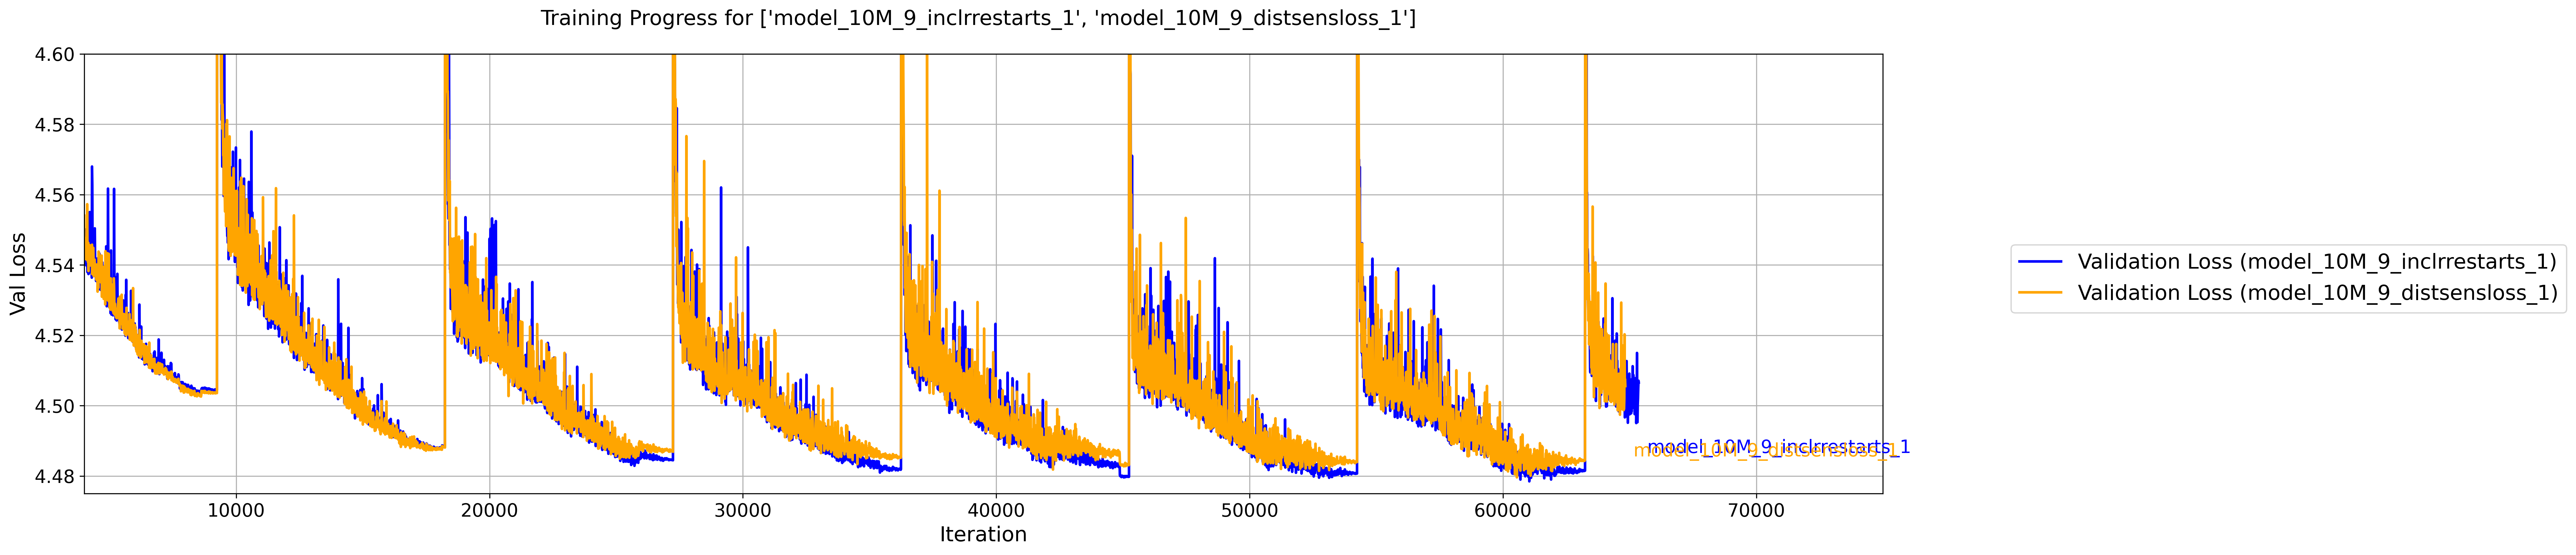

In [3]:
anal.plotting.plot_validation_run(model_names, use_log=False, y_lim=(4.475, 4.6), x_lim=(4000, 75000))

In [4]:
df = anal.tables.get_default_df(model_names)
print("Results sorted by min val loss")
display(df[['model_name', 'iters_trained', 'min_saved_train_loss', 'min_saved_val_loss'] + anal.tables.model_config_columns].sort_values(by='min_saved_val_loss', ascending=True))

Results sorted by min val loss


,model_name,iters_trained,min_saved_train_loss,min_saved_val_loss,batch_size,block_size,learning_rate,min_lr,lr_decay_iters,lr_scheduler,n_layer,n_head,n_embd,scheme,preparation_name
0,model_10M_9_inclrrestarts_1,65360,4.472512,4.479803,128,NaN,0.001,0.000001,9000,cosine_annealing_with_warm_restarts,4,2,512,unknown,unknown
1,model_10M_9_distsensloss_1,64830,4.473290,4.480695,128,NaN,0.001,0.000001,9000,cosine_annealing_with_warm_restarts,4,2,512,unknown,unknown


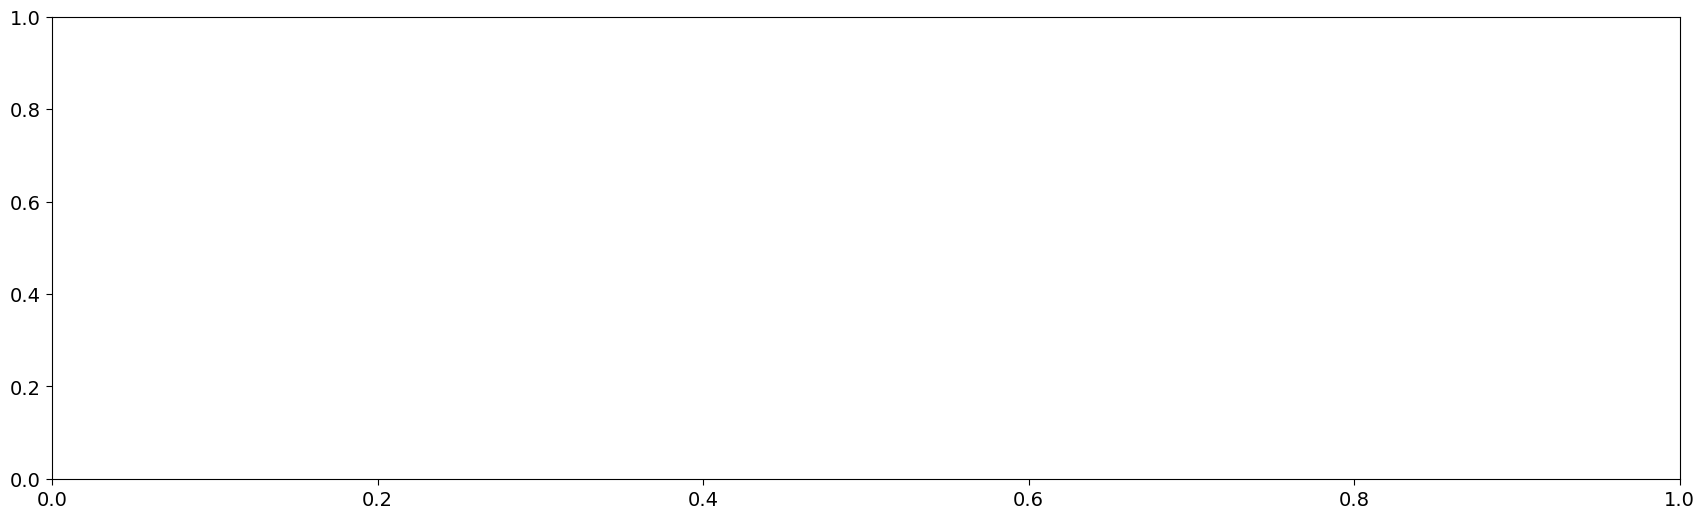

In [23]:
all_columns = ["e", "px", "py", "pz", "pt", "eta", "theta", "phi"]

plotter = anal.plotting()
plotter.load_data_by_model_names(model_names)

all_particles_bricks = []
leading_particles_bricks = []
for column in all_columns:
    brick_all = pw.Brick(f'all_{column}', figsize=(8, 6))
    plotter.compare_distributions_all(model_names, column_name=column, normalized=False, use_log=False, auto_show=False, in_ax=brick_all)
    all_particles_bricks.append(brick_all)

    brick_leading = pw.Brick(f'leading_{column}', figsize=(8, 6))
    plotter.compare_distributions_leading(model_names, column_name=column, normalized=False, use_log=False, auto_show=False, in_ax=brick_leading)
    leading_particles_bricks.append(brick_leading)

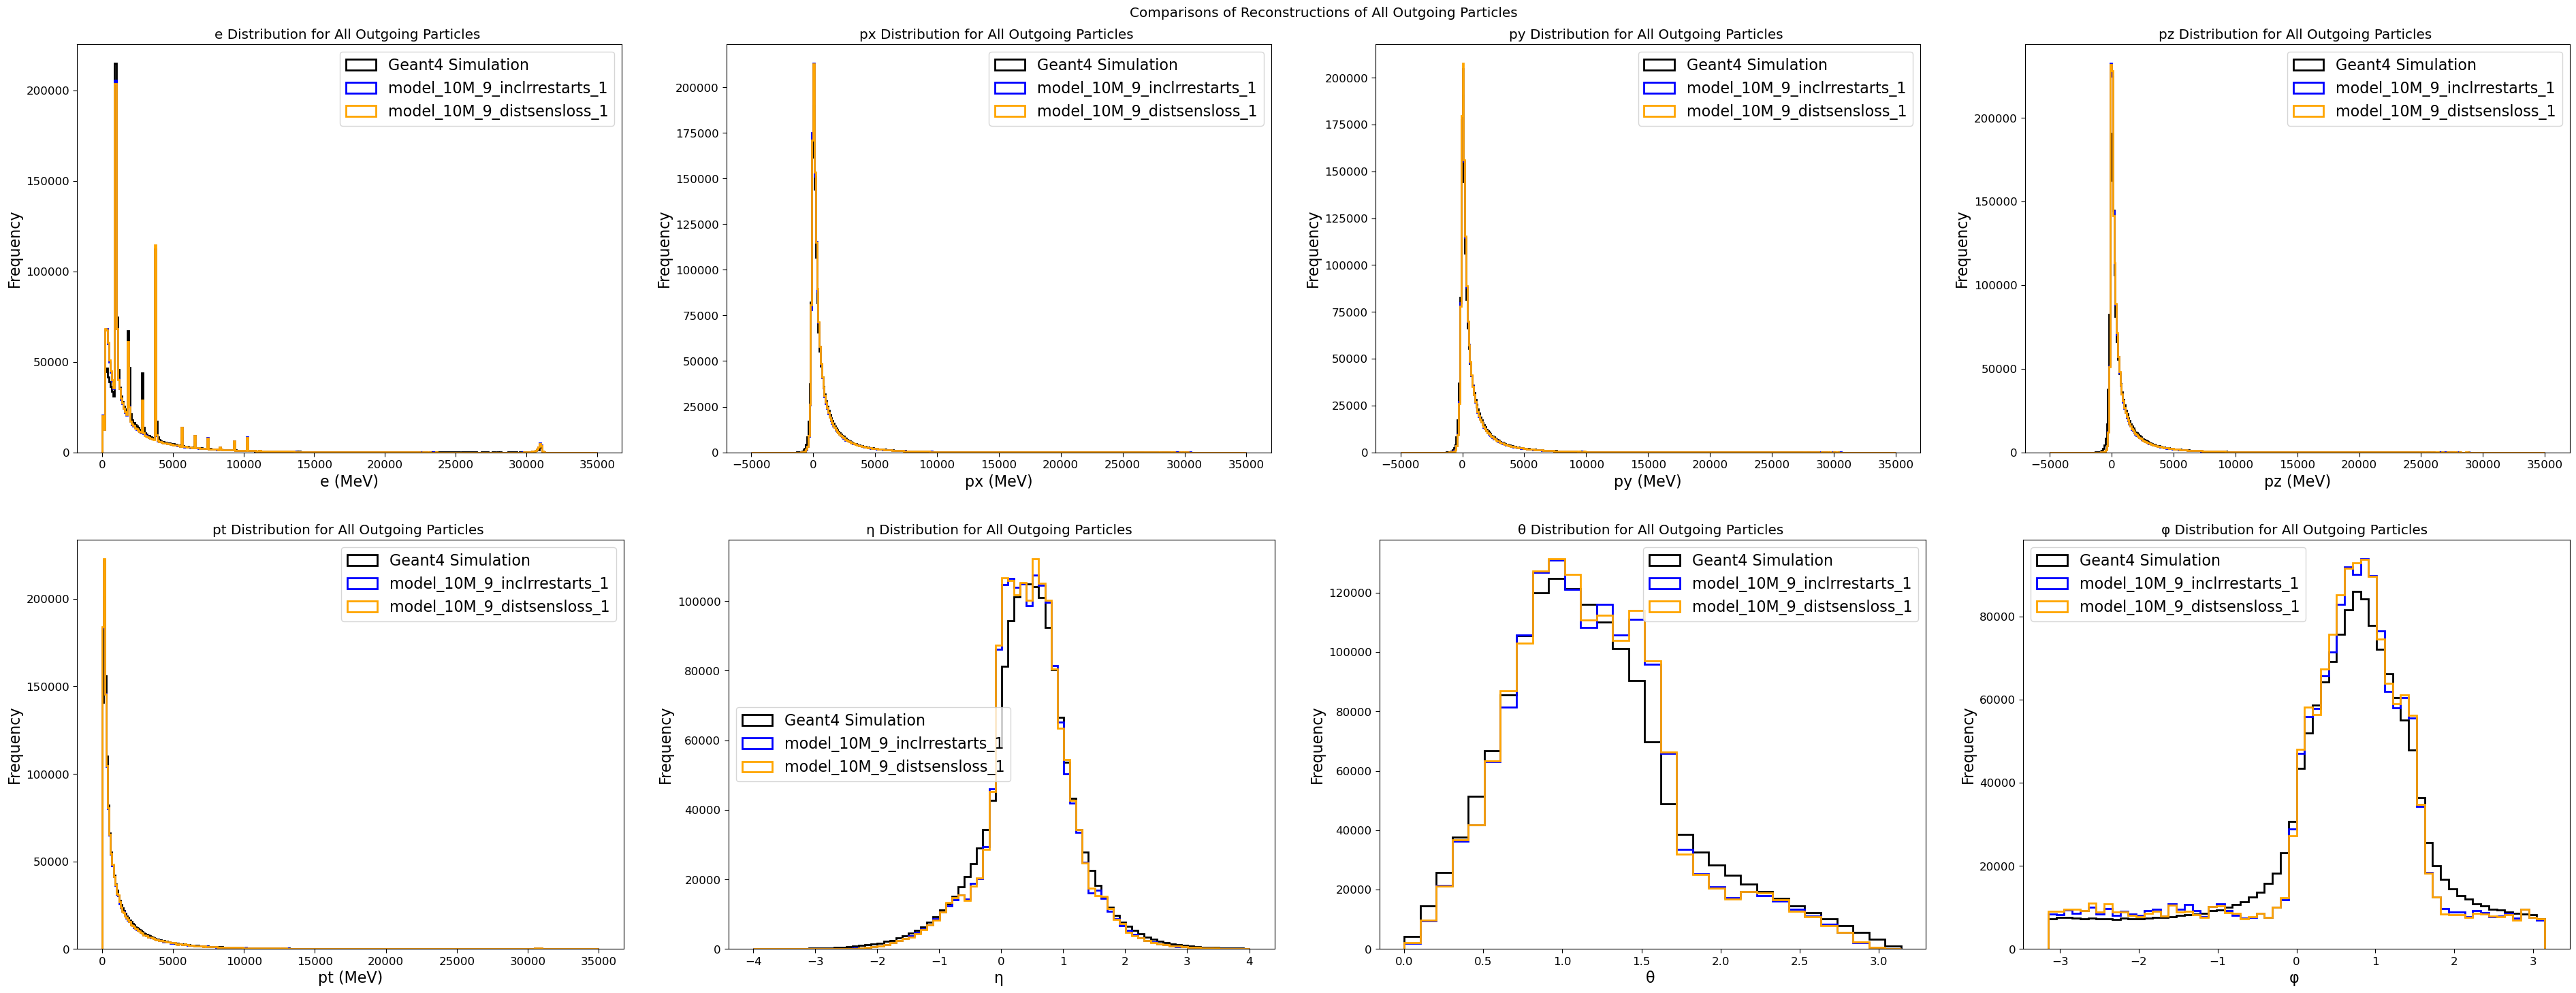

In [26]:
wall = (all_particles_bricks[0] | all_particles_bricks[1] | all_particles_bricks[2] | all_particles_bricks[3]) / (all_particles_bricks[4] | all_particles_bricks[5] | all_particles_bricks[6] | all_particles_bricks[7])
wall.set_suptitle('Comparisons of Reconstructions of All Outgoing Particles')
wall.savefig()

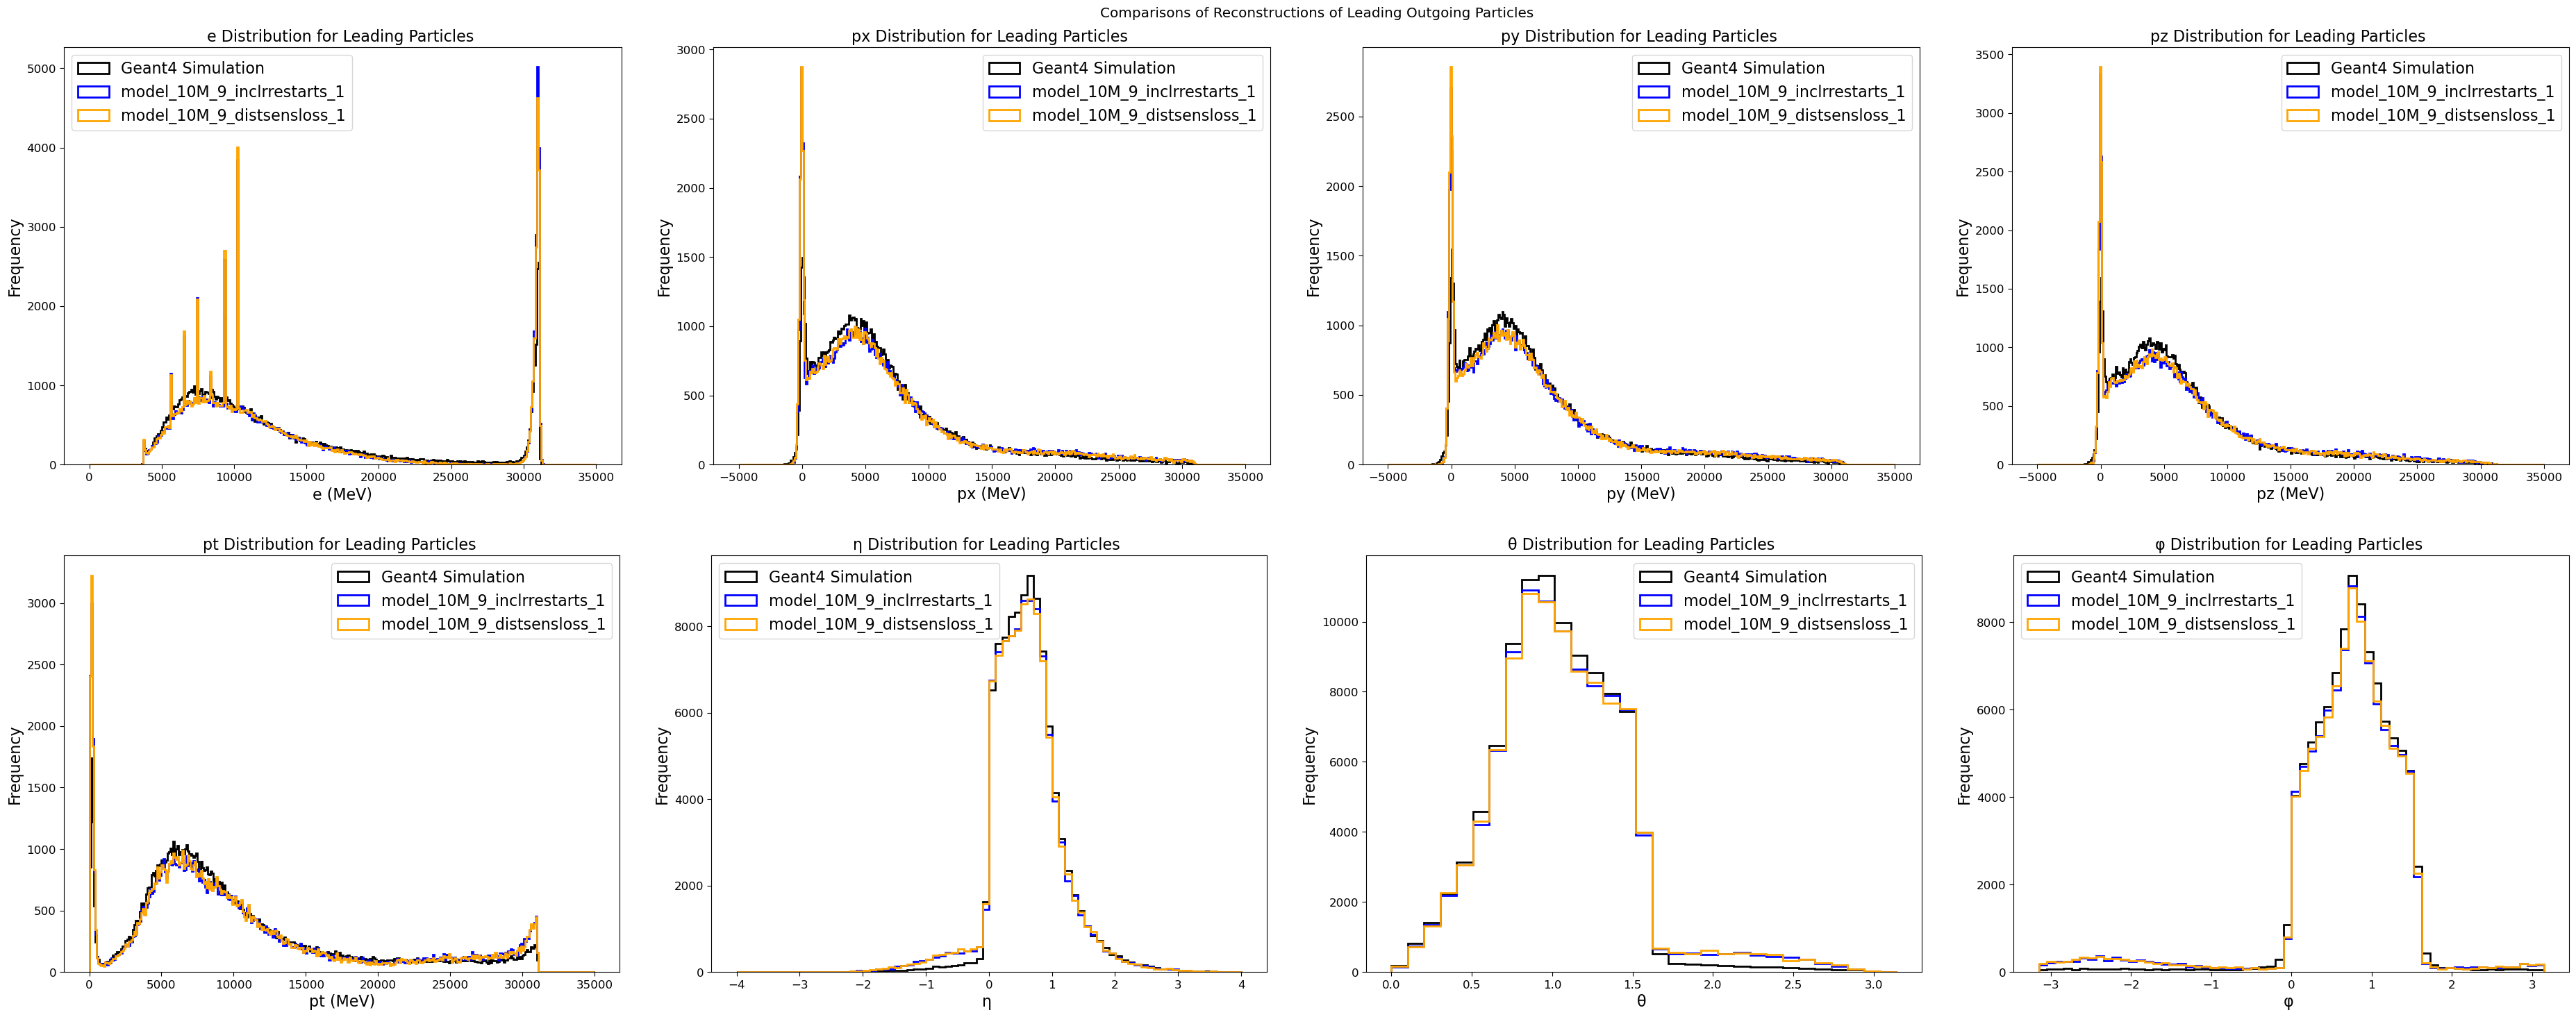

In [27]:
wall_leading = (leading_particles_bricks[0] | leading_particles_bricks[1] | leading_particles_bricks[2] | leading_particles_bricks[3]) / (leading_particles_bricks[4] | leading_particles_bricks[5] | leading_particles_bricks[6] | leading_particles_bricks[7])
wall_leading.set_suptitle('Comparisons of Reconstructions of Leading Outgoing Particles')
wall_leading.savefig()